<h1 style="text-align: center;"> Prelims Demography Tutorial 1 - Population Measures </h1>
<h2 style="text-align: center;"> Python Solution </h2>

Load the required packages and set up the paths

In [43]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px
from pathlib import Path

data_path = Path('').resolve().parents[0] / 'data'

# Question 1
Load the data

In [25]:
data_1 = pd.read_csv(data_path / 'mort.csv')

## a & b

In [26]:
# calculate column sums
data_1.loc[data_1.shape[0], :] = ['total'] + data_1.drop(columns=['age']).apply(np.sum, axis=0).tolist()

# deaths / population
data_1['coal_cdr'] = data_1['coal_deaths'] / data_1['coal_pop']
data_1['engine_cdr'] = data_1['engine_deaths'] / data_1['engine_pop']
data_1['ew_cdr'] = data_1['ew_deaths'] / data_1['ew_pop']

# reorder columns for better readability
data_1 = data_1[['age', 'coal_pop', 'coal_deaths', 'coal_cdr', 'engine_pop', 'engine_deaths', 'engine_cdr', 'ew_pop', 'ew_deaths', 'ew_cdr']]

## Visualisation - seaborn

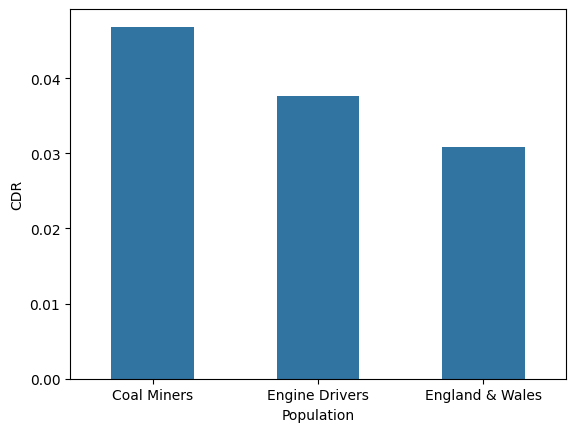

In [47]:
# bar chart showing the CDR
data_1_cdr = data_1.loc[data_1['age'] == 'total', ['coal_cdr', 'engine_cdr', 'ew_cdr']].transpose().reset_index()
data_1_cdr.columns = ['Population', 'CDR']

sns.barplot(data=data_1_cdr, x='Population', y='CDR', width=0.5)
plt.xticks(ticks=range(3), labels=['Coal Miners', 'Engine Drivers', 'England & Wales'])
plt.show()

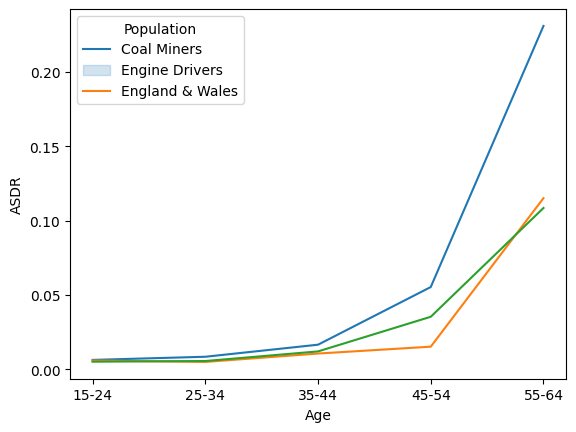

In [39]:
# line chart showing the ASDR
# firstly, transform the data to long format
data_1_long = data_1.loc[data_1['age'] != 'total', ['age', 'coal_cdr', 'engine_cdr', 'ew_cdr']].melt(id_vars='age', 
                                                                                                     value_vars=['coal_cdr', 'engine_cdr', 'ew_cdr'], 
                                                                                                     var_name='population', 
                                                                                                     value_name='asdr')

# plot the data
sns.lineplot(data=data_1_long, x='age', y='asdr', hue='population')
plt.ylabel('ASDR')
plt.xlabel('Age')
plt.legend(title='Population', labels=['Coal Miners', 'Engine Drivers', 'England & Wales'])
plt.show()

## Visualisation - plotly

In [52]:
# bar chart showing the CDR
data_1_cdr = data_1.loc[data_1['age'] == 'total', ['coal_cdr', 'engine_cdr', 'ew_cdr']].transpose().reset_index()
data_1_cdr.columns = ['Population', 'CDR']

fig = px.bar(data_1_cdr, x='Population', y='CDR')
fig.update_xaxes(tickvals=data_1_cdr['Population'], ticktext=['Coal Miners', 'Engine Drivers', 'England & Wales'])
fig.show()

In [56]:
# line chart showing the ASDR
# firstly, transform the data to long format
data_1_long = data_1.loc[data_1['age'] != 'total', ['age', 'coal_cdr', 'engine_cdr', 'ew_cdr']].melt(id_vars='age',
                                                                                                     value_vars=['coal_cdr', 'engine_cdr', 'ew_cdr'],
                                                                                                     var_name='population',
                                                                                                     value_name='asdr')

# plot the data
fig = px.line(data_1_long, x='age', y='asdr', color='population')
fig.update_yaxes(title='ASDR')
fig.update_xaxes(title='Age')
fig.update_legends(title='Population')
legend_text = {'coal_cdr':'Coal Miners', 'engine_cdr': 'Engine Drivers', 'ew_cdr': 'England & Wales'}
fig.for_each_trace(lambda t: t.update(name = legend_text[t.name],
                                      legendgroup = legend_text[t.name],
                                      hovertemplate = t.hovertemplate.replace(t.name, legend_text[t.name])
                                      )
                   )
fig.show()

# Question 2